# Q2b)
Since
\begin{array}{c}
K_{i j}=j^{2} E_{1}^{(0)} \delta_{i j} \\
V_{i j}=\lambda \frac{2}{a} \int_{0}^{a} d x \sin \left(\frac{i \pi x}{a}\right)\left(x-\frac{a}{2}\right)^{4} \sin \left(\frac{j \pi x}{a}\right)
\end{array}

First define 
$$
J_4(n) = \int_0^1 du (u-1/4)cos(\pi au)
$$
Rewritten as delta
$$
J_{4}(n)=\delta_{n, 0} \frac{1}{80}+\left(1-\delta_{n, 0}\right) \frac{1+(-1)^{n}}{2}\left(\frac{1}{(n \pi)^{2}}-\frac{24}{(n \pi)^{4}}\right)
$$
That$$
V_{i j}=\lambda a^{4}\left[J_{4}(i-j)-J_{4}(i+j)\right] \equiv \lambda a^{4} F_{i j}
$$
And the matrix
$$
\frac{H_{i j}}{E_{1}^{(0)}}=j^{2} \delta_{i j}+\lambda a^{4} \frac{2 m_{0}}{\hbar^{2}} \frac{a^{2}}{\pi^{2}} F_{i j} = j^{2} \delta_{i j} + \pi^{4} s^{6} F_{i j}
$$
Construct the matrix in code:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la


def delta(m, n):
    if n == m:
        delta = 1
    else:
        delta = 0
    return delta
    

def j4(n):    
    if n == 0:
        return 1/80
    else:
        return (1+(-1)**n)/2*(1/(n*np.pi)**2 - 24/(n*np.pi)**4)
        
    
def fij(i, j):
    return j4(i-j) - j4(i+j)

def isw(s, size): #### infinite square well basis
    i = 0
    hij = np.zeros((size, size))
    while i < size:
        j = 0
        while j < size: 
            elem = (j+1)**2*delta(i+1, j+1) + np.pi**4*s**6*fij(i+1, j+1) 
            hij[i, j] = elem
            j = j+1
        i = i+1
           
    eigenValues, eigenVectors = la.eig(hij)
    eigenValues = np.real(eigenValues)
    
    index = np.linspace(0, size, size)
    
    idx = eigenValues.argsort()[::1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    
    return eigenValues, eigenVectors, index

es1, evs1, ns1 = isw(1, 800)
es2, evs2, ns2 = isw(2, 800)
es5, evs5, ns5 = isw(5, 800)
es10, evs10, ns10 = isw(10, 800)

Since energy $$
E_{n}=\left(\frac{\hbar^{2}}{2 m_{0}}\right)^{2 / 3} \lambda^{1 / 3} \frac{\epsilon_{n}}{s^{2}}
$$
The coefficient $\frac{\epsilon_{n}}{s^{2}}$ is determined as:

In [2]:
print('When s = 1, E0/e0 = ', es1[0]/1)
print('When s = 2, E0/e0 = ', es2[0]/2**2)
print('When s = 5, E0/e0 = ', es5[0]/5**2)
print('When s = 10, E0/e0 = ', es10[0]/10**2)

When s = 1, E0/e0 =  1.2254173873316159
When s = 2, E0/e0 =  1.0603620940347849
When s = 5, E0/e0 =  1.060362090487117
When s = 10, E0/e0 =  1.06036209047772


# c)
Plot the exact energy with the unit $\left(\frac{\hbar^{2}}{2 m_{0}}\right)^{2 / 3} \lambda^{1 / 3}$

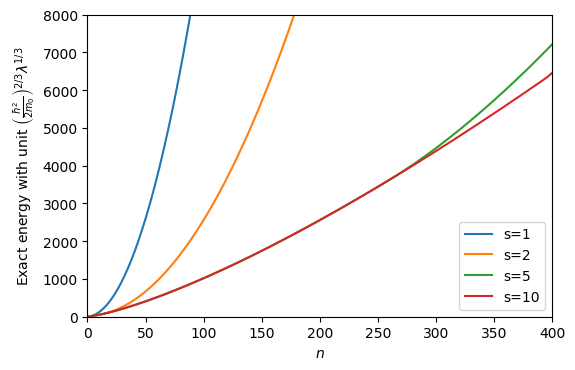

In [12]:
plt.figure(dpi=100)
plt.plot(ns1, es1/1, label = 's=1')
plt.plot(ns2, es2/2**2, label = 's=2')
plt.plot(ns5, es5/5**2, label = 's=5')
plt.plot(ns10, es10/10**2, label = 's=10')
plt.xlim(0, 400)
plt.ylim(0, 8000)
plt.ylabel(r'Exact energy with unit $\left(\frac{\hbar^{2}}{2 m_{0}}\right)^{2 / 3} \lambda^{1 / 3}$')
plt.xlabel(r'$n$')
plt.legend()

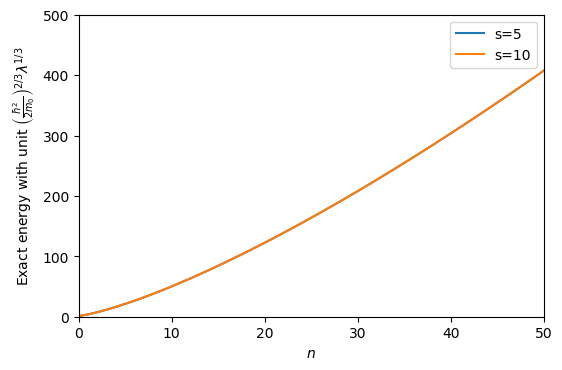

In [4]:
plt.figure(dpi=100)
#plt.plot(ns1, es1/1, label = 's=1')
#plt.plot(ns2, es2/2**2, label = 's=2')
plt.plot(ns5, es5/5**2, label = 's=5')
plt.plot(ns10, es10/10**2, label = 's=10')
plt.xlim(0, 50)
plt.ylim(0, 500)
plt.ylabel(r'Exact energy with unit $\left(\frac{\hbar^{2}}{2 m_{0}}\right)^{2 / 3} \lambda^{1 / 3}$')
plt.xlabel(r'$n$')
plt.legend()

For the overlaping $s=5$ and $s=10$ energy (n less than around 250), is the results indicative $\lambda x^4$ potential. As the energy goes up, the effect of potential shows up again cause the division.

# d)
Consider $V=\lambda(x-1/2)^4$ as perturbation $H'=\lambda(x-1/2)^4$, then:$$
E^{(0)}_n = \langle n| \lambda(x-1/2)^4 |n\rangle
$$

Since $$
V_{i j}= \lambda \frac{2}{a} \int_{0}^{a} d x \sin \left(\frac{i \pi x}{a}\right)\left(x-\frac{a}{2}\right)^{4} \sin \left(\frac{j \pi x}{a}\right)=\lambda a^{4}\left[J_{4}(i-j)-J_{4}(i+j)\right] \equiv \lambda a^{4} F_{i j}
$$
Therefore
\begin{equation} \label{eq1}
\begin{split}
\langle n| \lambda(x-1/2)^4 |n\rangle = \lambda a^{4}\left[J_{4}(0) - J_{4}(2n)\right] = \frac{\lambda a^4}{80}           
\end{split}
\end{equation}
$ \lambda a^{4} \frac{2 m_{0}}{\hbar^{2}} \frac{a^{2}}{\pi^{2}} = \pi^4 s^6$ $\rightarrow$ $a^4 = \left( \frac{\hbar}{2m} \right)^{2/3}\lambda^{-2/3}\pi^4s^4$, so 
$$
E^{(1)}_n = \frac{\lambda a^4}{80}  = \left( \frac{\hbar}{2m} \right)^{2/3}\lambda^{1/3}\pi^4s^4\left(\frac{1}{80}-\frac{1}{4n^2\pi^2}+\frac{3}{2n^4\pi^4}\right)
$$
So
$$
E_n^{(0)}+E^{(1)}_n = \left( \frac{\hbar}{2m} \right)^{2/3}\lambda^{1/3}\left(\frac{n^2}{s^2}+\frac{\pi^4s^4}{80}-\frac{\pi^4s^4}{4n^2\pi^2}+\frac{3\pi^4s^4}{2n^4\pi^4}\right)
$$
As $n$ goes large, $\frac{\pi^4s^4}{4n^2\pi^2}$ and $\frac{3\pi^4s^4}{2n^4\pi^4}$ terms vanish.

/home/alex/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0,'$n$')

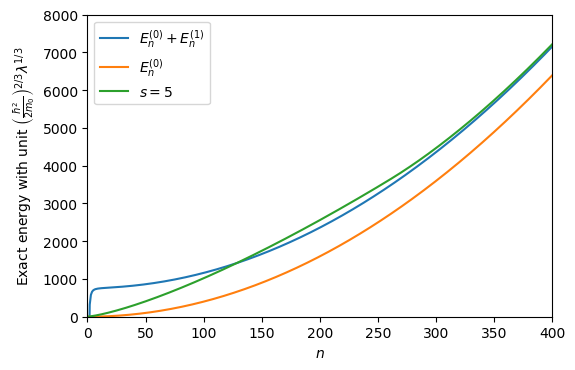

In [11]:
plt.figure(dpi=100)
En0 = ns5**2/5**2
En1 = np.pi**4*5**4*(1/80-(1/(4*ns5**2*np.pi**2) +3/(2*ns5**4*np.pi**4)))
plt.plot(ns5, En0+En1, label = r'$E_n^{(0)}+E_n^{(1)}$')
plt.plot(ns5, En0, label = r'$E_n^{(0)}$')
plt.xlim(0, 400)
plt.ylim(0, 8000)
plt.plot(ns5, es5/5**2, label = r'$s=5$')
plt.legend()
plt.ylabel(r'Exact energy with unit $\left(\frac{\hbar^{2}}{2 m_{0}}\right)^{2 / 3} \lambda^{1 / 3}$')
plt.xlabel(r'$n$')

# e)
Since $\alpha \equiv m_{0} \omega / \hbar$ and $\alpha = \left( \frac{6\lambda m_0}{\hbar^2} \right)^{1/3}$ from part (a), we have $$
 \frac{m_{0} \omega}{ \hbar} = \left( \frac{6\lambda m_0}{\hbar^2} \right)^{1/3}
$$
Get $\lambda = \frac{m_0^2w^3}{6\hbar}$ and $\hbar \omega=2\left(3^{1 / 3}\right)\left(\frac{\hbar^{2}}{2 m_{0}}\right)^{2 / 3} \lambda^{1 / 3}$. Therefore, in order to consist with (b), define energy unit to be 
$$
E_0 = \frac{hw}{2\left(3^{1 / 3}\right)} = \left(\frac{\hbar^{2}}{2 m_{0}}\right)^{2 / 3} \lambda^{1 / 3}
$$

$H_{i j} \equiv\langle i|\hat{H}| j\rangle = \langle i|K| j\rangle + \langle i|V| j\rangle $ 

Where $$\langle K\rangle = -\langle i|\frac{p^2}{2m_0}| j\rangle =  -\frac{1}{2m_0}\langle i|p^2| j\rangle$$

Since $\hat{p}=i \sqrt{\frac{\hbar m \omega}{2}}\left(a^{\dagger}-a\right)$, that $ \hat{p}^2=- {\frac{\hbar m \omega}{2}}\left(a^{\dagger}a^{\dagger}+aa-aa^{\dagger}-a^{\dagger}a\right)$

Therefore$$
\langle K\rangle = \frac{1}{2 m_{0}}\left\langle i\left|p^{2}\right| j\right\rangle=-\frac{\hbar \omega}{4}\left[\sqrt{(j+2)(j+1)} \delta_{i, j+2}+\sqrt{j(j-1)} \delta_{i, j-2}-(2 j+1) \delta_{i, j}\right]
$$
For $\langle V\rangle $
$$\langle V\rangle = \langle i|\lambda x^4| j\rangle $$
Where $\hat{x}=\sqrt{\frac{\hbar}{2 m \omega}}\left(a^{\dagger}+a\right) $, that $\hat{x}^4=\left({\frac{\hbar}{2 m \omega}}\right)^2 \left(a^{\dagger}+a\right)^4 $

Subsituted $\lambda = \frac{m_0^2w^3}{6\hbar}$ in, we get$$
\langle V\rangle = \frac{hw}{24}\langle i|\left(a^{\dagger}+a\right)\left(a^{\dagger}+a\right)\left(a^{\dagger}+a\right)\left(a^{\dagger}+a\right)| j\rangle
$$

Divide $E_0 = \frac{\hbar w}{2\left(3^{1 / 3}\right)}$ to construct a dimensionless matrix.
$$
H_{ij}/E_{0} = -\frac{3^{1/3}}{2}\left[\sqrt{(j+2)(j+1)} \delta_{i, j+2}+\sqrt{j(j-1)} \delta_{i, j-2}-(2 j+1) \delta_{i j}\right]+ \frac{3^{1/3}}{12}v_{i,j}
$$
Where $v_{ij}$ is



\begin{equation} 
\begin{split}
v_{ij}  = &  \langle i|[a^{\dagger}a^{\dagger} +aa +(2a^{\dagger}a+1) ][a^{\dagger}a^{\dagger} +aa +(2a^{\dagger}a+1) ]| j\rangle  \\
 =&\sqrt{ (j+4)(j+3)(j+2)(j+1)  }\delta_{i,j+4} \\
 & + \sqrt{ j(j-1)(j-1)j  }\delta_{i,j} \\
 & + 2\sqrt{ (j+2)(j+1)jj  }\delta_{i,j+2}+ \sqrt{ (j+2)(j+1)  }\delta_{i,j+2} \\
 & + \sqrt{ (j+1)(j+2)(j+2)(j+1)  }\delta_{i,j} \\
 & + \sqrt{ (j-3)(j-2)(j-1)j }\delta_{i,j-4} \\
 & + 2\sqrt{ (j-1)jjj  }\delta_{i,j-2}+ \sqrt{ (j-1)j  }\delta_{i,j-2} \\
 & + 2\sqrt{ (j+2)(j+2)(j+2)(j+1)  }\delta_{i,j+2}+ \sqrt{ (j+2)(j+1)  }\delta_{i,j+2} \\
 & + 2\sqrt{ (j-2)(j-2)(j-1)j  }\delta_{i,j-2}+ \sqrt{ (j-1)j  }\delta_{i,j-2} \\
 & + 4j^2\delta_{i,j} +4j\delta_{i,j} + \delta_{i,j} \\
\end{split}
\end{equation}

Then put the $H_{ij}/E_0$ to the program below:

In [6]:
def qho(size):

    i = 0
    kij = np.zeros((size, size))

    ij1 = np.zeros((size, size))
    ij2_m = np.zeros((size, size))
    ij2_p = np.zeros((size, size))
    ij4_m = np.zeros((size, size))
    ij4_p = np.zeros((size, size))
    while i < size:
        j = 0
        while j < size: 
            kij[i, j] = -(3**(1/3))/2*(np.sqrt((j+2)*(j+1))*delta(i, j+2)+np.sqrt(j*(j-1))*delta(i, j-2) - (2*j+1)*delta(i,j))
            
            ij4_p[i, j] = np.sqrt((j+1)*(j+2)*(j+3)*(j+4))*delta(i, j+4)
            ij4_m[i, j] = np.sqrt((j)*(j-1)*(j-2)*(j-3))*delta(i, j-4)
            
            ij2_p[i, j] = (np.sqrt(j**2*(j+2)*(j+1))+np.sqrt((j+2)*(j+1))+np.sqrt((j+2)**3*(j+1)))*2*delta(i,j+2)
            ij2_m[i, j] = (np.sqrt( (j-2)**2*(j-1)*j ) + np.sqrt( (j-1)*j ) + np.sqrt( (j-1)*j**3) )*2*delta( i,j-2 )
            
            ij1[i, j] = (4*(j**2+j)+ 1 + (j+1)*(j+2) + j*(j-1) )*delta(i, j)
            

            j = j+1
        i = i+1        
    
    vij = (ij4_p + ij4_m + ij2_p + ij2_m + ij1)*3**(1/3)/12
    hij = vij + kij
    eigenValues, eigenVectors = la.eig(hij)
    eigenValues = np.real(eigenValues)
    
    index = np.linspace(0, size-1, size)
    
    idx = eigenValues.argsort()[::1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    
    return hij, eigenValues, eigenVectors, index

hij1, eigenValues1, eigenVectors1, index1 = qho(1)
hij2, eigenValues2, eigenVectors2, index2 = qho(2)
hij5, eigenValues5, eigenVectors5, index5 = qho(5)
hij10, eigenValues10, eigenVectors10, index10 = qho(10)
hij20, eigenValues20, eigenVectors20, index20 = qho(20)
hij50, eigenValues50, eigenVectors50, index50 = qho(50)

The ground state energy with the unit of $E_0 = \left(\frac{\hbar^2}{2m_0}\right)^{2/3}\lambda^{1/3} $ is shown as:

In [7]:
print('When N = 1, En/e0 = ', eigenValues1[0])
print('When N = 2, En/e0 = ', eigenValues2[0])
print('When N = 5, En/e0 = ', eigenValues5[0])
print('When N = 10, En/e0 = ', eigenValues10[0])
print('When N = 20, En/e0 = ', eigenValues20[0])
print('When N = 50, En/e0 = ', eigenValues50[0])

When N = 1, En/e0 =  1.0816871777305561
When N = 2, En/e0 =  1.0816871777305561
When N = 5, En/e0 =  1.0631238922817747
When N = 10, En/e0 =  1.0604497934468193
When N = 20, En/e0 =  1.0603621577401106
When N = 50, En/e0 =  1.0603620904842708


Text(0.5,0,'$n$')

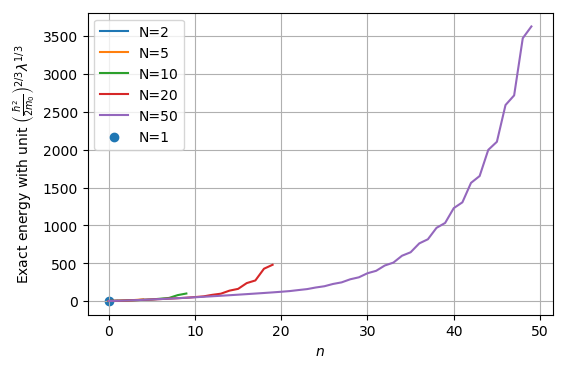

In [13]:
plt.figure(dpi=100)
plt.scatter(index1, eigenValues1, label = 'N=1')
plt.plot(index2, eigenValues2, label = 'N=2')
plt.plot(index5, eigenValues5, label = 'N=5')
plt.plot(index10, eigenValues10, label = 'N=10')
plt.plot(index20, eigenValues20, label = 'N=20')
plt.plot(index50, eigenValues50, label = 'N=50')
plt.legend()
plt.grid()
plt.ylabel(r'Exact energy with unit $\left(\frac{\hbar^{2}}{2 m_{0}}\right)^{2 / 3} \lambda^{1 / 3}$')
plt.xlabel(r'$n$')

The the deviations are truncation error, now zoom  N from 0 to 20 

Text(0.5,0,'$n$')

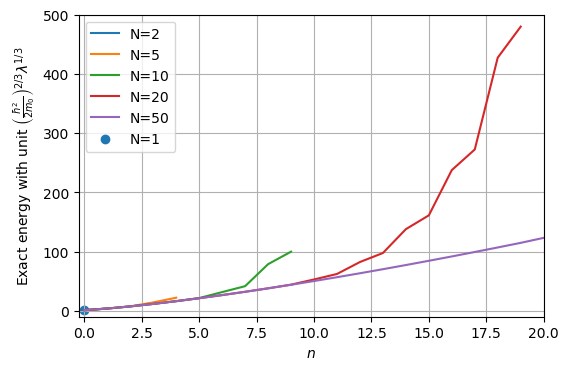

In [14]:
plt.figure(dpi=100)
plt.scatter(index1, eigenValues1, label = 'N=1')
plt.plot(index2, eigenValues2, label = 'N=2')
plt.plot(index5, eigenValues5, label = 'N=5')
plt.plot(index10, eigenValues10, label = 'N=10')
plt.plot(index20, eigenValues20, label = 'N=20')
plt.plot(index50, eigenValues50, label = 'N=50')
plt.xlim(-0.25, 20)
plt.ylim(-10, 500)
plt.legend()
plt.grid()
plt.ylabel(r'Exact energy with unit $\left(\frac{\hbar^{2}}{2 m_{0}}\right)^{2 / 3} \lambda^{1 / 3}$')
plt.xlabel(r'$n$')